Updated: 07/02/2024

This workbook looks at the residual between the CCE and extrapolated ringdown. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qnmfitsrd as qnmfits
from multiprocessing import Pool
from spatial_reconstruction_tests.spatial_reconstruction import *
from matplotlib.animation import FuncAnimation
from scipy.interpolate import UnivariateSpline
from Visualisation.qnm_vis import * 
from qnmfitsrd.CCE_file_getter import *
import datetime
from scipy.optimize import least_squares

l_max = 5
n_max = 5

In [49]:
CCE_sim1 = CCE_to_sim_simplified(sim_num='0001')
CCE_sim2 = CCE_to_sim_simplified(sim_num='0002')
CCE_sim3 = CCE_to_sim_simplified(sim_num='0003')
CCE_sim4 = CCE_to_sim_simplified(sim_num='0004')
CCE_sim5 = CCE_to_sim_simplified(sim_num='0005')
CCE_sim6 = CCE_to_sim_simplified(sim_num='0006')
CCE_sim7 = CCE_to_sim_simplified(sim_num='0007')
CCE_sim8 = CCE_to_sim_simplified(sim_num='0008')
CCE_sim9 = CCE_to_sim_simplified(sim_num='0009')
CCE_sim10 = CCE_to_sim_simplified(sim_num='0010')
CCE_sim11 = CCE_to_sim_simplified(sim_num='0011')
CCE_sim12 = CCE_to_sim_simplified(sim_num='0012')
CCE_sim13 = CCE_to_sim_simplified(sim_num='0013')
CCE_sim305 = CCE_to_sim_simplified(sim_num='0305')

In [3]:
ext_sim1 = qnmfits.SXS(ID=1, zero_time=(2,2))
ext_sim2 = qnmfits.SXS(ID=2, zero_time=(2,2))
ext_sim3 = qnmfits.SXS(ID=3, zero_time=(2,2))
ext_sim4 = qnmfits.SXS(ID=4, zero_time=(2,2))
ext_sim5 = qnmfits.SXS(ID=5, zero_time=(2,2))   
ext_sim6 = qnmfits.SXS(ID=6, zero_time=(2,2))
ext_sim7 = qnmfits.SXS(ID=7, zero_time=(2,2))
ext_sim8 = qnmfits.SXS(ID=8, zero_time=(2,2))
ext_sim9 = qnmfits.SXS(ID=9, zero_time=(2,2))
ext_sim10 = qnmfits.SXS(ID=10, zero_time=(2,2))
ext_sim11 = qnmfits.SXS(ID=11, zero_time=(2,2))
ext_sim12 = qnmfits.SXS(ID=12, zero_time=(2,2))
ext_sim13 = qnmfits.SXS(ID=13, zero_time=(2,2))
ext_sim305 = qnmfits.SXS(ID=305, zero_time=(2,2))

/data/rvnd2/python_envs/python-3.11-clone/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
Found the following files to load from the SXS catalog:
    SXS:BBH:0001v6/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0001v6/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


100%|██████████| 136M/136M [00:21<00:00, 6.70MB/s] 


Found the following files to load from the SXS catalog:
    SXS:BBH:0002v7/Lev6/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0002v7/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5


100%|██████████| 159M/159M [00:25<00:00, 6.52MB/s] 


Found the following files to load from the SXS catalog:
    SXS:BBH:0003v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0003v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


100%|██████████| 157M/157M [00:27<00:00, 6.10MB/s] 


Found the following files to load from the SXS catalog:
    SXS:BBH:0004v5/Lev6/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0004v5/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5


100%|██████████| 151M/151M [00:24<00:00, 6.47MB/s] 


Found the following files to load from the SXS catalog:
    SXS:BBH:0005v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0005v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


100%|██████████| 144M/144M [00:24<00:00, 6.15MB/s] 


Found the following files to load from the SXS catalog:
    SXS:BBH:0006v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0006v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


100%|██████████| 102M/102M [00:17<00:00, 6.13MB/s] 


Found the following files to load from the SXS catalog:
    SXS:BBH:0007v5/Lev6/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0007v5/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5


100%|██████████| 135M/135M [00:22<00:00, 6.33MB/s] 


Found the following files to load from the SXS catalog:
    SXS:BBH:0008v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0008v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


100%|██████████| 102M/102M [00:16<00:00, 6.38MB/s] 


Found the following files to load from the SXS catalog:
    SXS:BBH:0009v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0009v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


100%|██████████| 89.3M/89.3M [00:14<00:00, 6.68MB/s]


Found the following files to load from the SXS catalog:
    SXS:BBH:0010v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0010v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


100%|██████████| 100M/100M [00:16<00:00, 6.39MB/s] 


Found the following files to load from the SXS catalog:
    SXS:BBH:0011v5/Lev6/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0011v5/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5


100%|██████████| 112M/112M [00:19<00:00, 5.93MB/s] 


Found the following files to load from the SXS catalog:
    SXS:BBH:0012v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0012v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


100%|██████████| 95.7M/95.7M [00:16<00:00, 6.17MB/s]


Found the following files to load from the SXS catalog:
    SXS:BBH:0013v5/Lev5/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0013v5/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


100%|██████████| 114M/114M [00:18<00:00, 6.37MB/s] 


Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5


100%|██████████| 73.1M/73.1M [00:12<00:00, 6.38MB/s]


1.2212026034520165
0.9999999899440033
0.9999999983300005
1.0004396992438829
1.0004591540143728
1.0004601318711066
1.3450980138969482
1.4999992798629518
1.4999989750008755
1.500684418192987
1.5006935311406624
1.5006696578353054
1.500680352647488
1.5006796015068786


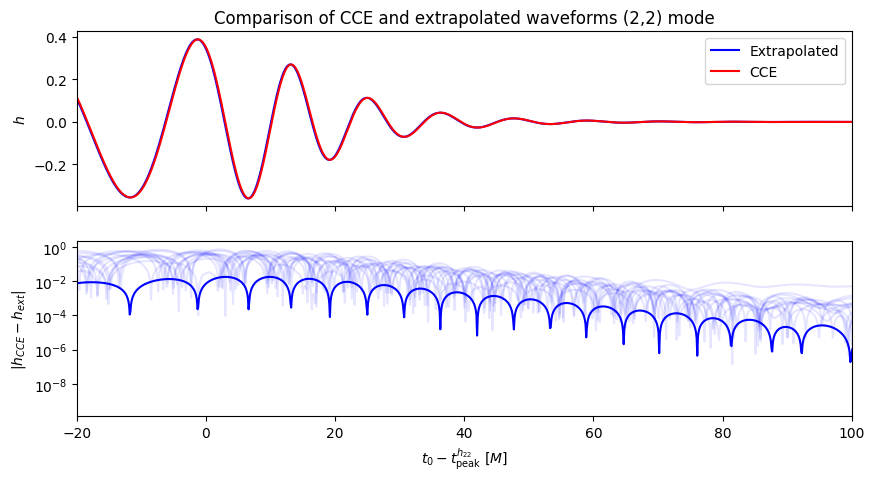

In [69]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(10, 5), sharex=True)

ax[0].set_title('Comparison of CCE and extrapolated waveforms (2,2) mode')
ax[1].set_xlabel('$t_0 - t^{h_{22}}_\mathrm{peak}\ [M]$')
ax[0].set_ylabel('$h$')
ax[1].set_ylabel('$|h_{CCE} - h_{ext}|$')

CCEs = [CCE_sim305, CCE_sim1, CCE_sim2, CCE_sim3, CCE_sim4, CCE_sim5, CCE_sim6, CCE_sim7, CCE_sim8, CCE_sim9, CCE_sim10, CCE_sim11, CCE_sim12, CCE_sim13]
exts = [ext_sim305, ext_sim1, ext_sim2, ext_sim3, ext_sim4, ext_sim5, ext_sim6, ext_sim7, ext_sim8, ext_sim9, ext_sim10, ext_sim11, ext_sim12, ext_sim13]

#CCEs = [CCE_sim305]
#exts = [ext_sim305]

alpha_switch = True

for i in range(14):
    alpha = 0.1
    CCE = CCEs[i]
    ext = exts[i]
    CCE_data = np.interp(ext.times, CCE.times, CCE.h[2,2])
    if alpha_switch:
        alpha = 1
        ax[0].plot(ext.times, ext.h[2,2].real, c='b', label='Extrapolated')
        ax[0].plot(ext.times, CCE_data.real, c='r', label='CCE')
    ax[1].plot(ext.times, abs(ext.h[2,2].real - CCE_data.real), c='b', alpha=alpha)
    ax[1].set_yscale('log')
    ax[1].set_xlim(-20,100)
    ax[0].legend()
    alpha_switch = False 
